In [0]:
#!unzip air-pollution-in-seoul.zip

In [74]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [76]:
# Retriving data for station code 103 for CO
data_103=data[(data['Station code']==103) & (data['CO']>0)]
print(len(data_103))
print(data_103.head(10))

25643
       Measurement date  Station code  ...  PM10  PM2.5
51810  2017-01-01 00:00           103  ...  70.0   68.0
51811  2017-01-01 01:00           103  ...  73.0   66.0
51812  2017-01-01 02:00           103  ...  67.0   65.0
51813  2017-01-01 03:00           103  ...  68.0   65.0
51814  2017-01-01 04:00           103  ...  65.0   61.0
51815  2017-01-01 05:00           103  ...  62.0   59.0
51816  2017-01-01 06:00           103  ...  66.0   61.0
51817  2017-01-01 07:00           103  ...  65.0   58.0
51818  2017-01-01 08:00           103  ...  67.0   69.0
51819  2017-01-01 09:00           103  ...  70.0   74.0

[10 rows x 11 columns]


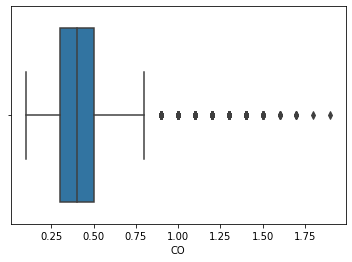

In [77]:
import seaborn as sns
sns.boxplot(data_103['CO'])

25243


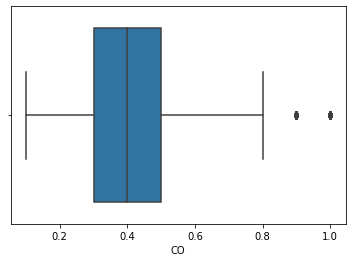

In [78]:
from scipy import stats
z = np.abs(stats.zscore(data_103['CO']))
threshold = 3
#print(len(np.where(z > 3)))
data_103_Rout = data_103[(z < 3)]
print(len(data_103_Rout))
sns.boxplot(data_103_Rout['CO'])

In [79]:
df=data_103_Rout['CO']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25243, 1)


In [80]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.1] [1.]
25243
0.0 1.0


In [81]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25238 [1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]


In [82]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25238, 5)


,x1,x2,x3,x4,y
0,1.000000,1.000000,0.888889,0.888889,0.888889
1,1.000000,0.888889,0.888889,0.888889,1.000000
2,0.888889,0.888889,0.888889,1.000000,1.000000
3,0.888889,0.888889,1.000000,1.000000,0.888889
4,0.888889,1.000000,1.000000,0.888889,0.888889
5,1.000000,1.000000,0.888889,0.888889,0.777778
6,1.000000,0.888889,0.888889,0.777778,0.888889
7,0.888889,0.888889,0.777778,0.888889,0.888889
8,0.888889,0.777778,0.888889,0.888889,1.000000
9,0.777778,0.888889,0.888889,1.000000,1.000000


In [83]:
print(matrix[:,4])

[[0.88888889]
 [1.        ]
 [1.        ]
 ...
 [0.33333333]
 [0.33333333]
 [0.33333333]]


In [84]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8329, 1) [[0.5390416 ]
 [0.33900634]
 [0.2326207 ]
 [0.43583996]
 [0.34989993]]


In [85]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8489498575119871
[0.02621742]
[[0.0071187  0.02153737 0.05258052 0.84757815]]


In [86]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.005673869602271103
absolute mean error :  0.0494615224814061
0.8431141377380038


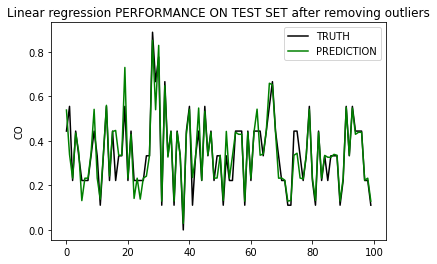

In [87]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('CO')
plt.legend()
plt.show()

(25643, 1)
[0.1] [1.9]
25643
0.0 1.0
25638 [0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.6666666666666667]
(8461, 1) [[0.06427685]
 [0.4807742 ]
 [0.06815104]
 [0.11627844]
 [0.11397721]]
mean squared eror :  0.0015417042964770713
absolute mean error :  0.025046318038664066
0.8661941211834103


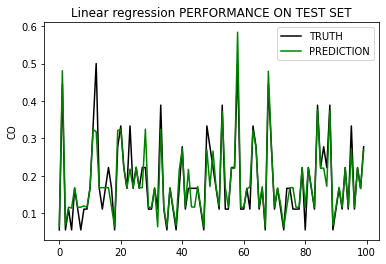

In [88]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_103['CO']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('CO')
plt.legend()
plt.show()

In [89]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0015417208726225054
absolute mean error :  0.025048282516021925
0.8661926825250941


In [90]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.001551058586162656
absolute mean error :  0.02554602382367549
0.8653822541120498


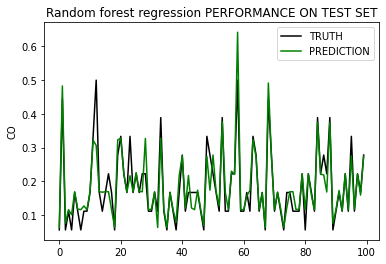

truth :  [[0.05555556]
 [0.44444444]
 [0.05555556]
 [0.11111111]
 [0.05555556]
 [0.16666667]
 [0.11111111]
 [0.05555556]
 [0.11111111]
 [0.11111111]]
prediction :  [0.06271385 0.48277387 0.07535324 0.11562881 0.10067872 0.16901924
 0.11739799 0.11562881 0.12674469 0.11562881]


In [91]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('CO')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [92]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.001544898520011826
0.025279571630673563
0.8659168916990136


In [93]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.0015937321729651809
absolute mean error :  0.022515069708638643
0.8616785757883819


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


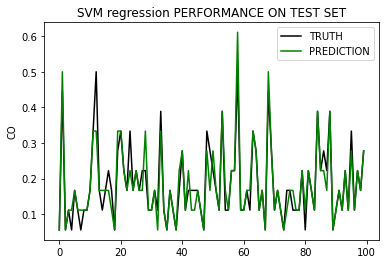

In [94]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('CO')
plt.legend()
plt.show()

In [95]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
17177/17177 [==============================] - 1s 70us/step - loss: 0.0498 - accuracy: 0.0017
Epoch 2/100
17177/17177 [==============================] - 1s 64us/step - loss: 0.0498 - accuracy: 0.0017
Epoch 3/100
17177/17177 [==============================] - 1s 64us/step - loss: 0.0498 - accuracy: 0.0017
Epoch 4/100
17177/17177 [==============================] - 1s 65us/step - loss: 0.0498 - accuracy: 0.0017
Epoch 5/100
17177/17177 [==============================] - 1s 64us/step - loss: 0.0498 - accuracy: 0.0017
Epoch 6/100
17177/17177 [==============================] - 1s 65us/step - loss: 0.0498 - accuracy: 0.0017
Epoch 7/100
17177/17177 [==============================] - 1s 65us/step - loss: 0.0498 - accuracy: 0.0017
Epoch 8/100
17177/17177 [==============================] - 1s 64us/step - loss: 0.0498 - accuracy: 0.0017
Epoch 9/100
17177/17177 [==============================] - 1s 65us/step - loss: 0.0498 - accuracy: 0.0017
Epoch 10/100
17177/17177 [====================

dict_keys(['loss', 'accuracy'])


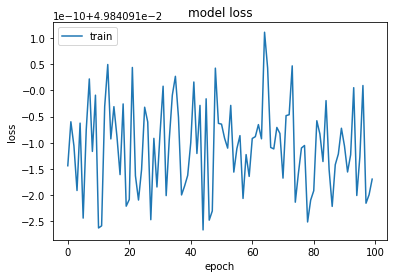

mean squared error :  0.048251892123774884
mean absolute error :  0.022515069708638643
0.8616785757883819


In [96]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


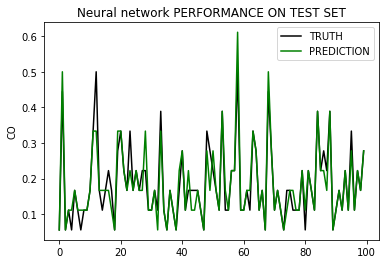

In [97]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('CO')
plt.legend()
plt.show()

In [98]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.22222222 0.22222222 0.22222222 0.22222222]
 [0.22222222 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.11111111]
 ...
 [0.5        0.44444444 0.33333333 0.27777778]
 [0.16666667 0.16666667 0.16666667 0.16666667]
 [0.11111111 0.11111111 0.16666667 0.16666667]]
(17177, 4)
(17177, 4, 1)


In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17177/17177 [==============================] - 7s 426us/step - loss: 0.0048
Epoch 2/100
17177/17177 [==============================] - 6s 351us/step - loss: 0.0021
Epoch 3/100
17177/17177 [==============================] - 6s 340us/step - loss: 0.0017
Epoch 4/100
17177/17177 [==============================] - 6s 324us/step - loss: 0.0016
Epoch 5/100
17177/17177 [==============================] - 5s 319us/step - loss: 0.0016
Epoch 6/100
17177/17177 [==============================] - 5s 316us/step - loss: 0.0016
Epoch 7/100
17177/17177 [==============================] - 5s 316us/step - loss: 0.0017
Epoch 8/100
17177/17177 [==============================] - 5s 314us/step - loss: 0.0017
Epoch 9/100
17177/17177 [==============================] - 5s 319us/step - loss: 0.0016
Epoch 10/100
17177/17177 [==============================] - 5s 314us/step - loss: 0.0016
Epoch 11/100
17177/17177 [==============================] - 5s 317us/step - loss: 0.0016
Epoch 12/100
17177/17177 [====

dict_keys(['loss'])


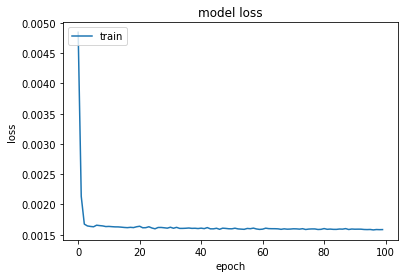

mean square error : 0.0015356509947066876
mean absolute error :  0.02524909620137942
0.8667194925954114


In [100]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

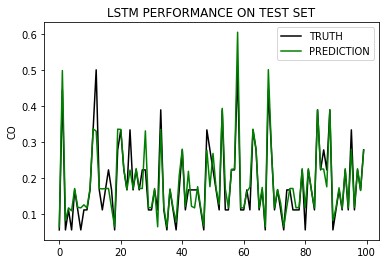

In [101]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('CO')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')